<a href="https://colab.research.google.com/github/smlrkh1107/Python3/blob/astronomy/1210(%EC%9B%94)_%EC%B2%9C%EB%AC%B8%EC%9A%B0%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #미션 1. 웹에서 파일 불러오기

In [4]:
# 1) 웹에있는 파일 불러오기 (파이썬 http 파일 다운로드)

import urllib
urllib.request.urlretrieve ("https://astropy.stsci.edu/data/tutorials/FITS-images/HorseHead.fits", "HorseHead.fits")

('HorseHead.fits', <http.client.HTTPMessage at 0x7f2a2dcad860>)

In [0]:
# 2)파일 오픈 후(텍스트or바이너리 어떻게 읽을것인가 결정.), 2880byte를 읽어낸 후 화면에 출력하기.
#END가 있는지 알기


f = open("HorseHead.fits",'rb')
line = f.read(2880)
print(line)





end_found = False

while (end_found == False):
  line = f.read(2880)
  print(line)
  
  if(line==""):
    break
  
  line = line.decodes("ascii")
  head = head + line
  
  for i range(80) : #한 줄에 80바이트씩 존재함 (엔터는 가시적으로 보이기 위해 있는거고 사실 80바이트씩 한 라인을 나타냄)
    reco



f.close()



* 1　　　　 2　　　　　3　　　　　 4　　　　　5         ....              ....  　　　8


* 12345678901234567890123456789012345678901234567890  

* 80byte가 한줄. 엔터로 넘기는 형식이 아님.


# #미션2.

In [17]:
#[정답] END가 있을때까지 HEAD이므로 있을 때 까지 무한루프

# SAMPLE 02. Load a header of a FITS file.
#

#
# Initialize variables.
file_path = "HorseHead.fits"
header = ""


#
# Open a file.
file = open(file_path, "rb")


#
# Read a header from the file.
end_found = False
while(end_found == False):
	buffer = file.read(2880)

	if(buffer == ""):    # 아무것도 없을 때 while문 탈출 ==> 아래 if문에 이건 FITS 포맷이 아니다. 라고 출력
		break

	buffer = buffer.decode("ascii")
	header = header + buffer

  
  #한 줄에 80바이트씩 존재함 (엔터는 가시적으로 보이기 위해 있는거고 사실 80바이트씩 한 라인을 나타냄)
	for i in range(80):  #2880/80 = 36
		record = buffer[i*80:(i+1)*80] # [0 : 80] 이지만 79까지 읽음. 마지막은 안읽음
		if(record.startswith('END')):  # startswith : 문자열의 처음 텍스트 찾기
			end_found = True
			break

if (end_found == False):
	print("The file is not correct FITS format.")

#
# Close the file.
file.close()

#
#
print(header)

SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768   '           /GSSS: Region Name                               PLATEID = 'A0JP    '           /GSSS: Plate ID                                  SCANNUM = '01      '           /GSSS: Scan Number                               DSCNDNUM= '00      '           /GSSS: De

#미션 3. 

>  FITS 헤더 읽어오기 및 정보가져오기



In [24]:
#
# SAMPLE 03. Decode a FITS header.
#

def get_value(header, keyword):
	value = ""
	records = int(len(header) / 80) # header의 라인 수?

	for i in range(records):
		record = header[i*80:(i+1)*80]
		if(record.startswith(keyword)):
			begin = 9; # = 이 9번 째 있으니까, 배열상 8번이다. 그 이후 9번자리부터 읽기 시작한다는 뜻.
			end = record.find('/') # 주석?찾기?
			value = record[begin:end].strip() # strip 양쪽 공백 지우기.
			break
		if(record.startswith("END")):
			break

	return value


#
# Initialize variables.
file_path = "HorseHead.fits"
header = ""


#
# Open a file.
file = open(file_path, "rb")


#
# Read a header from the file.
end_found = False
while(end_found == False):
	buffer = file.read(2880)

	if(buffer == ""):
		break

	buffer = buffer.decode("ascii")
	header = header + buffer

	for i in range(80):
		record = buffer[i*80:(i+1)*80]
		if(record.startswith('END')):
			end_found = True
			break

if (end_found == False):
	print("The file is not correct FITS format.")


#
# Decode the header.
bitpix = 0
naxis = 0
naxis1 = 0
naxis2 = 0
bzero = 0
bscale = 1.0

value = get_value(header, "BITPIX") #대소문자 구분
if(value != ""):	bitpix = int(value)

value = get_value(header, "NAXIS")
if(value != ""):	naxis = int(value)

value = get_value(header, "NAXIS1")
if(value != ""):	naxis1 = int(value)

value = get_value(header, "NAXIS2")
if(value != ""):	naxis2 = int(value)

value = get_value(header, "BZERO")
if(value != ""):	bzero = int(value)

value = get_value(header, "BSCALE")
if(value != ""):	bscale = float(value)

#
#
print("BITPIX = ", bitpix)
print("NAXIS = ", naxis)  
print("NAXIS1 = ", naxis1)
print("NAXIS2 = ", naxis2)
print("BSCALE = ", bscale)
print("BZERO = ", bzero)

#
# Close the file.
#file.close()



BITPIX =  16
NAXIS =  2
NAXIS1 =  891
NAXIS2 =  893
BSCALE =  1.0
BZERO =  0


* **BITPIX =  16** 
* **NAXIS =  2**　　　: 축이 두개 (x축,y축)
* **NAXIS1 =  891**
* **NAXIS2 =  893**
* **BZERO =  0**
* **BSCALE =  1.0**

# #미션4.


In [25]:

#
# Read a data from the file.

# binary data (byte)
data = file.read(naxis1 * naxis2 * int(bitpix/8))
print(data)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
# 1-D array (signed short)
data = np.frombuffer(data, dtype=np.dtype(">i2"))
print(data)
print(data.dtype)


[ 7201  6642  6642 ... 11987 12546 12546]
>i2


In [27]:
# 2-D array (signed short)   # 2D 데이터로 바꾸기
data = data.reshape((naxis2, naxis1))
print(data)
print(data.dtype)




[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]
>i2
[[ 7201.  6642.  6642. ...  9498.  9498. 10057.]
 [ 6642.  6363.  6642. ... 10057. 10616. 10616.]
 [ 6922.  6642.  6922. ... 10337. 11175. 10616.]
 ...
 [ 5412.  5132.  5412. ... 13000. 12580. 12021.]
 [ 5796.  5517.  5796. ... 12546. 12546. 11987.]
 [ 5796.  5796.  6076. ... 11987. 12546. 12546.]]
float64


In [35]:
# FLOAT형이라 그림을 못그릴 수도 있으니 아래를 주석처리하면 됨.
data = (data + bzero) / bscale
print(data)
print(data.dtype)

[[ 7201.  6642.  6642. ...  9498.  9498. 10057.]
 [ 6642.  6363.  6642. ... 10057. 10616. 10616.]
 [ 6922.  6642.  6922. ... 10337. 11175. 10616.]
 ...
 [ 5412.  5132.  5412. ... 13000. 12580. 12021.]
 [ 5796.  5517.  5796. ... 12546. 12546. 11987.]
 [ 5796.  5796.  6076. ... 11987. 12546. 12546.]]
float64


# #미션5.

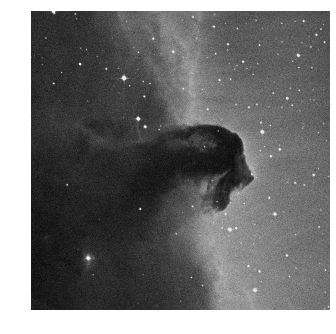

In [42]:
#
# SAMPLE 05. Display a FITS data.
#

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#
# Display an image.
plt.imshow(data, cmap=cm.gray)
plt.axis('off') #격자무늬 없애기 = plt.grid(None)
plt.show()



# #미션6.

In [34]:
#
# SAMPLE 06. Make a class.
#

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import FitsFile

fits = fitsfile.FitsFile()
fits.load_file("HorseHead.fits")

#
# Display an image.
plt.imshow(fits.data, cmap=cm.gray)
plt.show()



ModuleNotFoundError: ignored